In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from Testers import Tester
import pandas as pd
import random

In [ ]:
seed = 42
np.random.seed(seed)
random.seed(seed)

In [3]:
data = datasets.load_digits()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
trees_n = [5, 10, 15, 20, 25, 30, 35]
reps = 50

for i in trees_n:
    print(f"[Testing with {i} trees]")
    tester = Tester(X_test=X_test, y_test=y_test, X_train=X_train, y_train=y_train,
                    trees_n=i, T0=100.0, alpha=0.97, max_iterations=500,
                    reps=reps, dir_to_save='./../res/')
    data_dt, data_bagging, data_bagging_sa = tester.test_methods()

[Testing with 5 trees]
Testing Decision Tree
Iteration 1 completed
Iteration 2 completed
Iteration 3 completed
Iteration 4 completed
Iteration 5 completed

Testing Bagging
Iteration 1 completed
Iteration 2 completed
Iteration 3 completed
Iteration 4 completed
Iteration 5 completed

Testing Bagging SA
Iteration: 0, Temperature: 100.00000, Best fitness: 1.610, Fitness: 1.610, New fitness: 1.609
Iteration: 1, Temperature: 95.00000, Best fitness: 1.610, Fitness: 1.609, New fitness: 1.607
Iteration: 2, Temperature: 90.25000, Best fitness: 1.610, Fitness: 1.607, New fitness: 1.644
Iteration: 3, Temperature: 85.73750, Best fitness: 1.644, Fitness: 1.644, New fitness: 1.646
Iteration: 4, Temperature: 81.45062, Best fitness: 1.646, Fitness: 1.646, New fitness: 1.639
Iteration: 5, Temperature: 77.37809, Best fitness: 1.646, Fitness: 1.639, New fitness: 1.641
Iteration: 6, Temperature: 73.50919, Best fitness: 1.646, Fitness: 1.641, New fitness: 1.609
Iteration: 7, Temperature: 69.83373, Best fitn

In [5]:
res_dt = data_dt['Accuracy']
res_bagging = data_bagging['Accuracy']
res_bagging_sa = data_bagging_sa['Accuracy']

res_dataframe = pd.DataFrame({
    'Algorithm': ['Decision Tree', 'Bagging', 'Bagging SA'],
    'Mean': [res_dt.mean(), res_bagging.mean(), res_bagging_sa.mean()],
    'Std': [res_dt.std(), res_bagging.std(), res_bagging_sa.std()],
    'Min': [res_dt.min(), res_bagging.min(), res_bagging_sa.min()],
    'Max': [res_dt.max(), res_bagging.max(), res_bagging_sa.max()],
    'Median': [res_dt.median(), res_bagging.median(), res_bagging_sa.median()],
})

print(res_dataframe)

       Algorithm      Mean       Std       Min       Max    Median
0  Decision Tree  0.874444  0.008651  0.866667  0.888889  0.872222
1        Bagging  0.918333  0.011883  0.908333  0.938889  0.913889
2     Bagging SA  0.932778  0.015265  0.916667  0.952778  0.927778


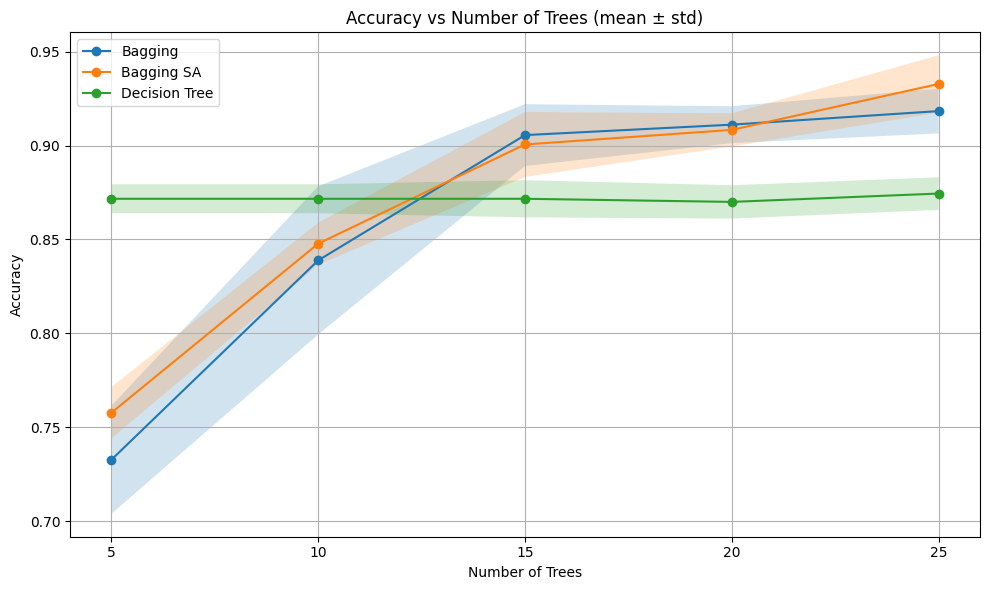

In [6]:
# Create plot
import matplotlib.pyplot as plt

def get_accuracy_mean_std(name: str, trees_n:int):
    df = pd.read_csv(f'./../res/accuracy_{name}_{trees_n}.csv')
    accuracy = df['Accuracy']
    return accuracy.mean(), accuracy.std()

X = trees_n

Y1 = [get_accuracy_mean_std('bagging', i)[0] for i in X]
Y2 = [get_accuracy_mean_std('bagging_sa', i)[0] for i in X]
Y3 = [get_accuracy_mean_std('dt', i)[0] for i in X]

Y1_std = [get_accuracy_mean_std('bagging', i)[1] for i in X]
Y2_std = [get_accuracy_mean_std('bagging_sa', i)[1] for i in X]
Y3_std = [get_accuracy_mean_std('dt', i)[1] for i in X]

plt.figure(figsize=(10, 6))
plt.plot(X, Y1, marker='o', label='Bagging')
plt.plot(X, Y2, marker='o', label='Bagging SA')
plt.plot(X, Y3, marker='o', label='Decision Tree')

plt.fill_between(X, np.array(Y1) - np.array(Y1_std), np.array(Y1) + np.array(Y1_std), alpha=0.2)
plt.fill_between(X, np.array(Y2) - np.array(Y2_std), np.array(Y2) + np.array(Y2_std), alpha=0.2)
plt.fill_between(X, np.array(Y3) - np.array(Y3_std), np.array(Y3) + np.array(Y3_std), alpha=0.2)

plt.title('Accuracy vs Number of Trees (mean ± std)')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.xticks(X)
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig('./../res/accuracy_vs_n_trees.png')
plt.show()

# save to csv
compared_by_accuracy = pd.DataFrame({
    'Trees_n': X,
    'Bagging': Y1,
    'bagging_std': Y1_std,
    'Bagging SA': Y2,
    'bagging_sa_std': Y2_std,
    'Decision Tree': Y3,
    'dt_std': Y3_std
})
compared_by_accuracy.to_csv('./../res/accuracy_vs_n_trees.csv', index=False)
    